# Week 12 Competition

## Milestones completed

1. Data collection. (10 Points) 
2. Pre-processing. (Choose atleast 3 options out of the following 6) (30 Points)
    Missing value handling. 
    Outlier detection and handling. 
    Encoding 
    Feature reduction 
    Standardization/normalization 
    Feature engineering 
3. Exploratory Data Analysis. (20 Points) 
    Univariate analysis
    Bivariate analysis
4. Modelling. (20 Points) 
5. Model fine tuning (20 Points) 


# 1. Data Collection

We choosen International visitors to London 2002–2020 Dataset for our case study from Office for National Statistics (ONS). You can access the original file from http://www.visitbritain.org/latest-quarterly-data-area

Importing necessary libraries

In [1]:
# Importing Numpy as np
import numpy as np
# Importing pandas as pd
import pandas as pd
# Importing Matplotlibrary's PyPlot as plt
import matplotlib.pyplot as plt
import seaborn as sns
# Importing sklearn
import sklearn
from scipy import stats
from matplotlib import rcParams
import sklearn
from sklearn import preprocessing
from sklearn.preprocessing import scale

In [2]:
# Reading the excel file into Pandas Dataframe 
dataset=pd.read_excel('international-visitors-london.xlsx') 
# Displaying the first 5 rows
dataset.head(5)

,year,quarter,market,dur_stay,mode,purpose,area,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,LONDON,3.572186,0.969138,6.954456,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,LONDON,9.284226,2.399577,12.604959,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,LONDON,0.877182,0.089833,2.153128,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,LONDON,0.163874,0.010160,0.163874,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,LONDON,1.648670,0.016789,1.650300,1


In [3]:
# Getting the basic details of the dataframe
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61462 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           61462 non-null  object 
 1   quarter        61462 non-null  object 
 2   market         61462 non-null  object 
 3   dur_stay       61462 non-null  object 
 4   mode           61462 non-null  object 
 5   purpose        61462 non-null  object 
 6   area           61462 non-null  object 
 7   Visits (000s)  61462 non-null  float64
 8   Spend (£m)     61462 non-null  float64
 9   Nights (000s)  61462 non-null  float64
 10  sample         61462 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.2+ MB


In [4]:
# Checking for Null values
dataset.isna().sum().to_frame('Null value count')

,Null value count
year,0
quarter,0
market,0
dur_stay,0
mode,0
purpose,0
area,0
Visits (000s),0
Spend (£m),0
Nights (000s),0


In [5]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

In [6]:
dataset.describe()

,Visits (000s),Spend (£m),Nights (000s),sample
count,61462.00,61462.00,61462.00,61462.00
mean,4.93,3.09,30.30,6.10
std,10.06,7.24,61.90,13.34
min,0.00,0.00,0.00,1.00
25%,0.82,0.32,3.90,1.00
50%,1.80,1.05,10.68,2.00
75%,4.42,3.01,29.48,5.00
max,187.49,373.23,2492.18,299.00


In [7]:
# Checking the details of features with Object datatype
dataset.describe(include=['object'])

,year,quarter,market,dur_stay,mode,purpose,area
count,61462,61462,61462,61462,61462,61462,61462
unique,19,4,62,4,3,5,1
top,2010,July-September,France,1-3 nights,Air,Holiday,LONDON
freq,3601,16827,2611,19710,46778,19695,61462


# 2.Pre-processing.

### (i).Outlier detection and handling.

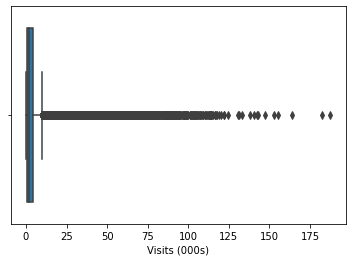

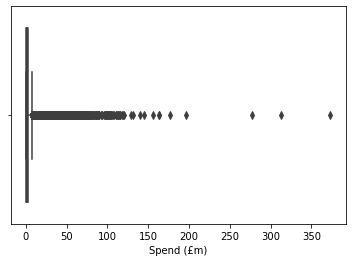

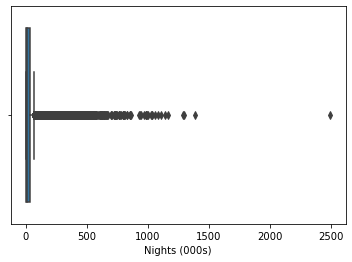

In [8]:
## checking outliers
for i in ['Visits (000s)', 'Spend (£m)', 'Nights (000s)']:
    #plt.title(i)
    sns.boxplot(x=dataset[i])
    plt.show() 

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


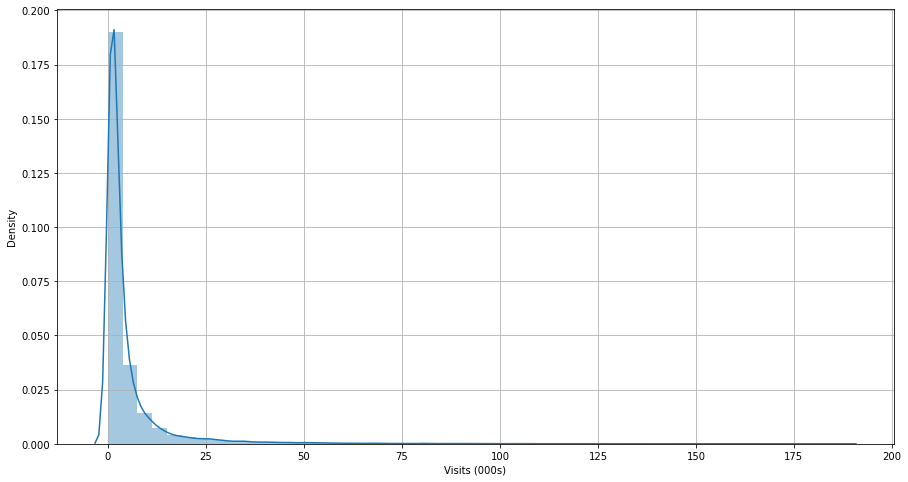

In [9]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(dataset['Visits (000s)'],ax=ax)
plt.grid()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


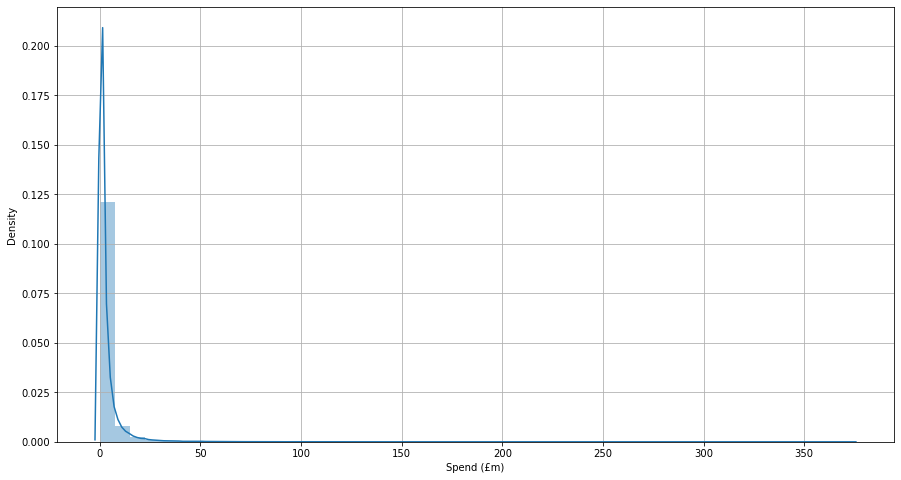

In [10]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(dataset['Spend (£m)'],ax=ax)
plt.grid()
plt.show()

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


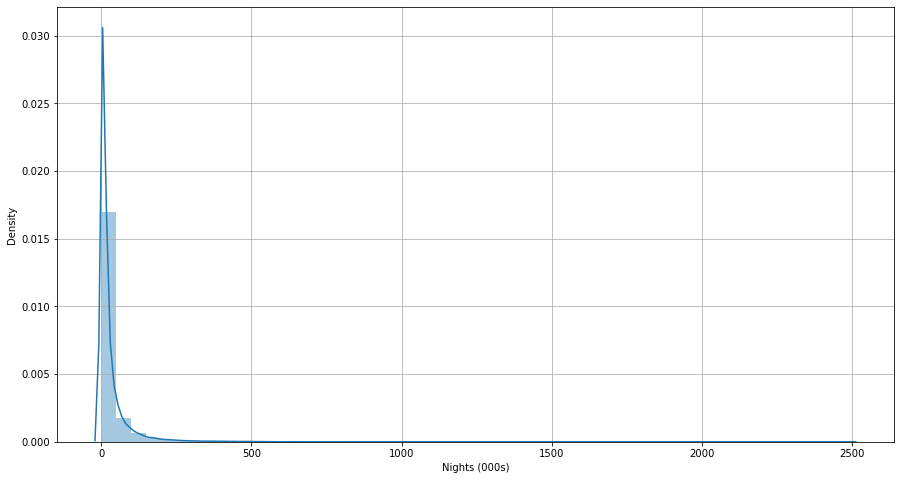

In [11]:
fig, ax = plt.subplots(figsize=(15,8))
sns.distplot(dataset['Nights (000s)'],ax=ax)
plt.grid()
plt.show()

Handling outliers in 'Visits (000s)'

In [12]:
Q1 = np.percentile(dataset['Visits (000s)'],25,interpolation='midpoint')
Q3 = np.percentile(dataset['Visits (000s)'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['Visits (000s)']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
#print('Outliers of visists=',outlier)
#print('The corresponding indexes are as follows:')
ind1=dataset['Visits (000s)'][(dataset['Visits (000s)']<lower_limit)|(dataset['Visits (000s)']>upper_limit)].index
ind=dataset.loc[ind1].index

In [13]:
dataset.drop(ind,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


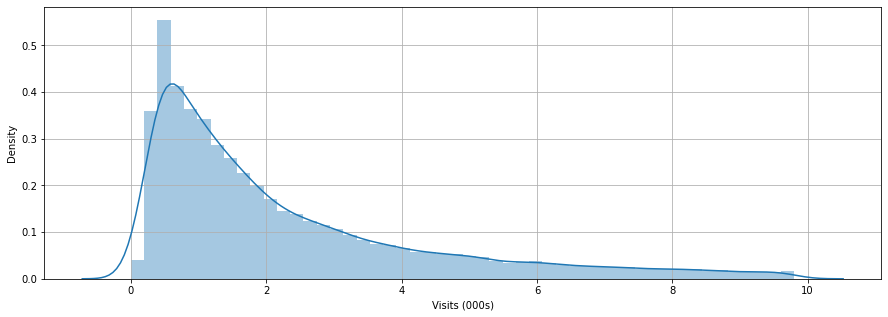

In [14]:
plt.subplots(figsize=(15,5))
sns.distplot(dataset['Visits (000s)'])
plt.grid()
plt.show()

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 54408 entries, 0 to 61461
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           54408 non-null  object 
 1   quarter        54408 non-null  object 
 2   market         54408 non-null  object 
 3   dur_stay       54408 non-null  object 
 4   mode           54408 non-null  object 
 5   purpose        54408 non-null  object 
 6   area           54408 non-null  object 
 7   Visits (000s)  54408 non-null  float64
 8   Spend (£m)     54408 non-null  float64
 9   Nights (000s)  54408 non-null  float64
 10  sample         54408 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 5.0+ MB


Handling outliers in 'Nights (000s)'

In [16]:
Q1=np.percentile(dataset['Nights (000s)'],25,interpolation='midpoint')
Q3=np.percentile(dataset['Nights (000s)'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['Nights (000s)']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
#print('Outliers of nights=',outlier)
ind1=dataset['Nights (000s)'][(dataset['Nights (000s)']<lower_limit)|(dataset['Nights (000s)']>upper_limit)].index
ind=dataset.loc[ind1].index

In [17]:
dataset.drop(ind,inplace=True)

C:\Users\HP\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


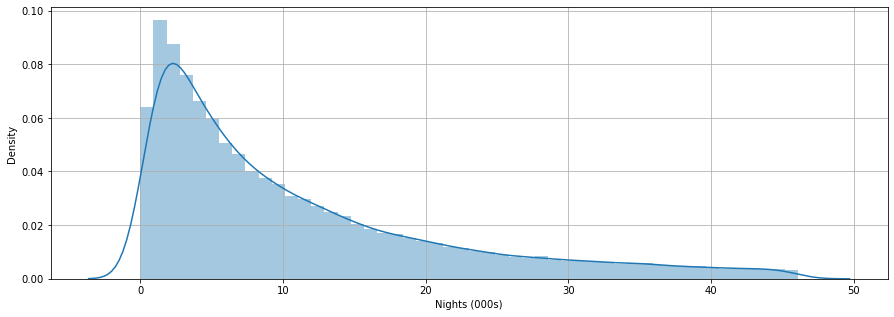

In [18]:
plt.subplots(figsize=(15,5))
sns.distplot(dataset['Nights (000s)'])
plt.grid()
plt.show()

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49103 entries, 0 to 61460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           49103 non-null  object 
 1   quarter        49103 non-null  object 
 2   market         49103 non-null  object 
 3   dur_stay       49103 non-null  object 
 4   mode           49103 non-null  object 
 5   purpose        49103 non-null  object 
 6   area           49103 non-null  object 
 7   Visits (000s)  49103 non-null  float64
 8   Spend (£m)     49103 non-null  float64
 9   Nights (000s)  49103 non-null  float64
 10  sample         49103 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.5+ MB


Handling outliers in 'Spend (£m)'

In [20]:
Q1=np.percentile(dataset['Spend (£m)'],25,interpolation='midpoint')
Q3=np.percentile(dataset['Spend (£m)'],75,interpolation='midpoint')
IQR=Q3-Q1
lower_limit=Q1-(1.5*IQR)
upper_limit=Q3+(1.5*IQR)
outlier=[]
for x in dataset['Spend (£m)']:
    if x>upper_limit or x<lower_limit:
        outlier.append(x)
#print('Outliers of spend=',outlier)
ind1=dataset['Spend (£m)'][(dataset['Spend (£m)']<lower_limit)|(dataset['Spend (£m)']>upper_limit)].index
ind=dataset.loc[ind1].index


In [21]:
dataset.drop(ind,inplace=True)

In [22]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45332 entries, 0 to 61460
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   year           45332 non-null  object 
 1   quarter        45332 non-null  object 
 2   market         45332 non-null  object 
 3   dur_stay       45332 non-null  object 
 4   mode           45332 non-null  object 
 5   purpose        45332 non-null  object 
 6   area           45332 non-null  object 
 7   Visits (000s)  45332 non-null  float64
 8   Spend (£m)     45332 non-null  float64
 9   Nights (000s)  45332 non-null  float64
 10  sample         45332 non-null  int64  
dtypes: float64(3), int64(1), object(7)
memory usage: 4.2+ MB


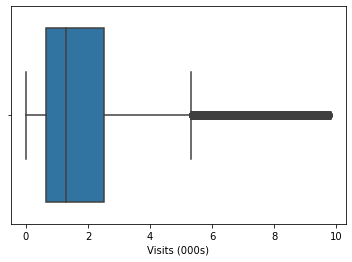

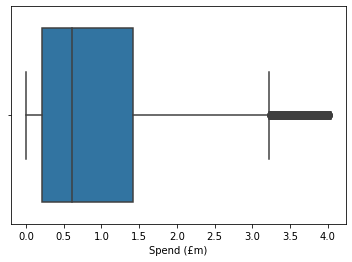

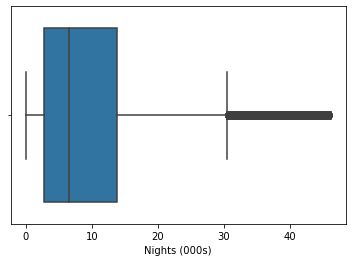

In [23]:
for i in ['Visits (000s)', 'Spend (£m)', 'Nights (000s)']:
    #plt.title(i)
    sns.boxplot(x=dataset[i])
    plt.show() 

### (ii). Feature reduction

'area' is a single entry column, which is irrelavent to analysis.

In [24]:
# Dropping obsolete columns
dataset.drop('area',axis=1,inplace=True)

In [25]:
dataset.head()

,year,quarter,market,dur_stay,mode,purpose,Visits (000s),Spend (£m),Nights (000s),sample
0,2002,January-March,Belgium,1-3 nights,Air,Holiday,3.57,0.97,6.95,5
1,2002,January-March,Belgium,1-3 nights,Air,Business,9.28,2.40,12.60,19
2,2002,January-March,Belgium,1-3 nights,Air,VFR,0.88,0.09,2.15,3
3,2002,January-March,Belgium,1-3 nights,Air,Miscellaneous,0.16,0.01,0.16,1
4,2002,January-March,Belgium,1-3 nights,Sea,Business,1.65,0.02,1.65,1


Taking a copy of the same dataset for Exploratory data analysis later

In [26]:
# Copying dataset into dataset1
dataset1=dataset

In [27]:
# Sample preview of Copied Dataframe
dataset.sample(5)

,year,quarter,market,dur_stay,mode,purpose,Visits (000s),Spend (£m),Nights (000s),sample
8835,2004,July-September,Mexico,4-7 nights,Air,Holiday,2.37,1.40,12.29,8
58822,2019,April-June,Other Western Europe,15+ nights,Air,VFR,0.99,0.11,3.95,1
40214,2013,July-September,Bahrain,8-14 nights,Air,Holiday,1.20,3.32,14.67,2
37885,2013,January-March,Portugal,1-3 nights,Air,VFR,1.40,0.02,2.71,1
54687,2017,October-December,Japan,1-3 nights,Tunnel,Business,2.99,3.86,8.93,1


### (iii). Encoding

In [28]:
dataset.describe(include=['object'])

,year,quarter,market,dur_stay,mode,purpose
count,45332,45332,45332,45332,45332,45332
unique,19,4,62,4,3,5
top,2004,July-September,Netherlands,1-3 nights,Air,Holiday
freq,2878,12099,1480,15281,33015,13406


In [29]:
dataset.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, '2020P'], dtype=object)

In [30]:
dataset['year'] = dataset['year'].replace(['2020P'],'2020')

In [31]:
dataset.year.unique()

array([2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012,
       2013, 2014, 2015, 2016, 2017, 2018, 2019, '2020'], dtype=object)

In [32]:
dataset['year']=dataset['year'].astype(str).astype(int)

In [33]:
dataset.describe(include=['object'])

,quarter,market,dur_stay,mode,purpose
count,45332,45332,45332,45332,45332
unique,4,62,4,3,5
top,July-September,Netherlands,1-3 nights,Air,Holiday
freq,12099,1480,15281,33015,13406


In [34]:
categorical_cols2=['market','quarter','dur_stay','mode','purpose']

In [35]:
#performing One hot encoding
data_encoded=pd.get_dummies(dataset,columns=categorical_cols2) 
data_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45332 entries, 0 to 61460
Data columns (total 83 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  45332 non-null  int32  
 1   Visits (000s)                         45332 non-null  float64
 2   Spend (£m)                            45332 non-null  float64
 3   Nights (000s)                         45332 non-null  float64
 4   sample                                45332 non-null  int64  
 5   market_Argentina                      45332 non-null  uint8  
 6   market_Australia                      45332 non-null  uint8  
 7   market_Austria                        45332 non-null  uint8  
 8   market_Bahrain                        45332 non-null  uint8  
 9   market_Belgium                        45332 non-null  uint8  
 10  market_Brazil                         45332 non-null  uint8  
 11  market_Bulgaria

# 3.Exploratory Data Analysis

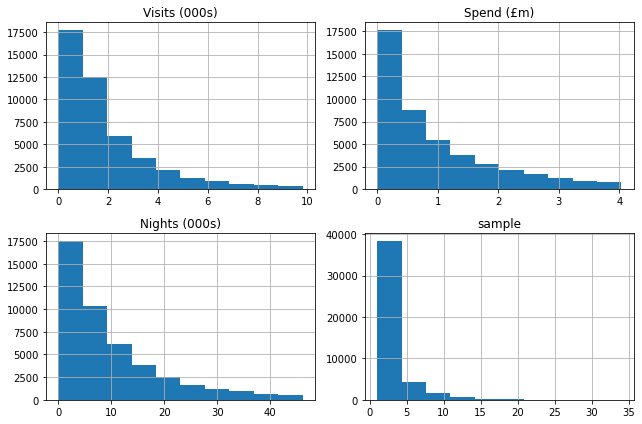

In [36]:
freqgraph=dataset1.select_dtypes(include=['float','int64'])
freqgraph.hist(figsize=(9,6))
plt.tight_layout()
plt.show()

Pie Chart 

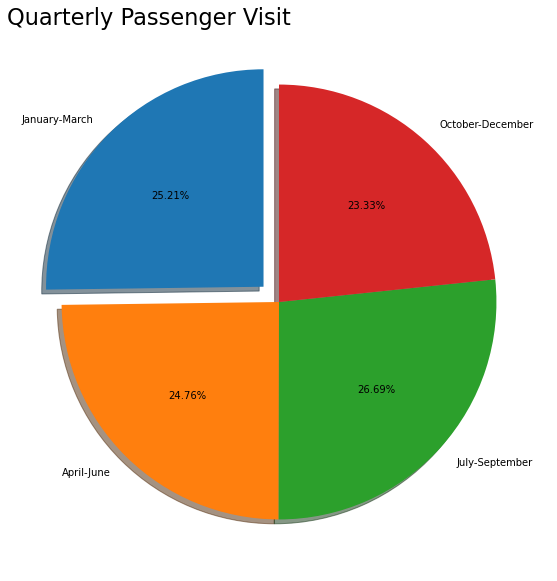

In [37]:
# Variable for plot
explode = (0.1, 0, 0, 0)
# Plotting a pie diagram
fig = plt.figure(figsize=(10, 10))
plt.pie(dataset1.loc[:,['quarter']].groupby('quarter').size(), explode=explode, shadow=True, startangle=90, labels = list(dataset1.quarter.unique()), autopct='%1.2f%%')
plt.title(label="Quarterly Passenger Visit",
          loc="left",
          fontsize=22.5)

plt.show()

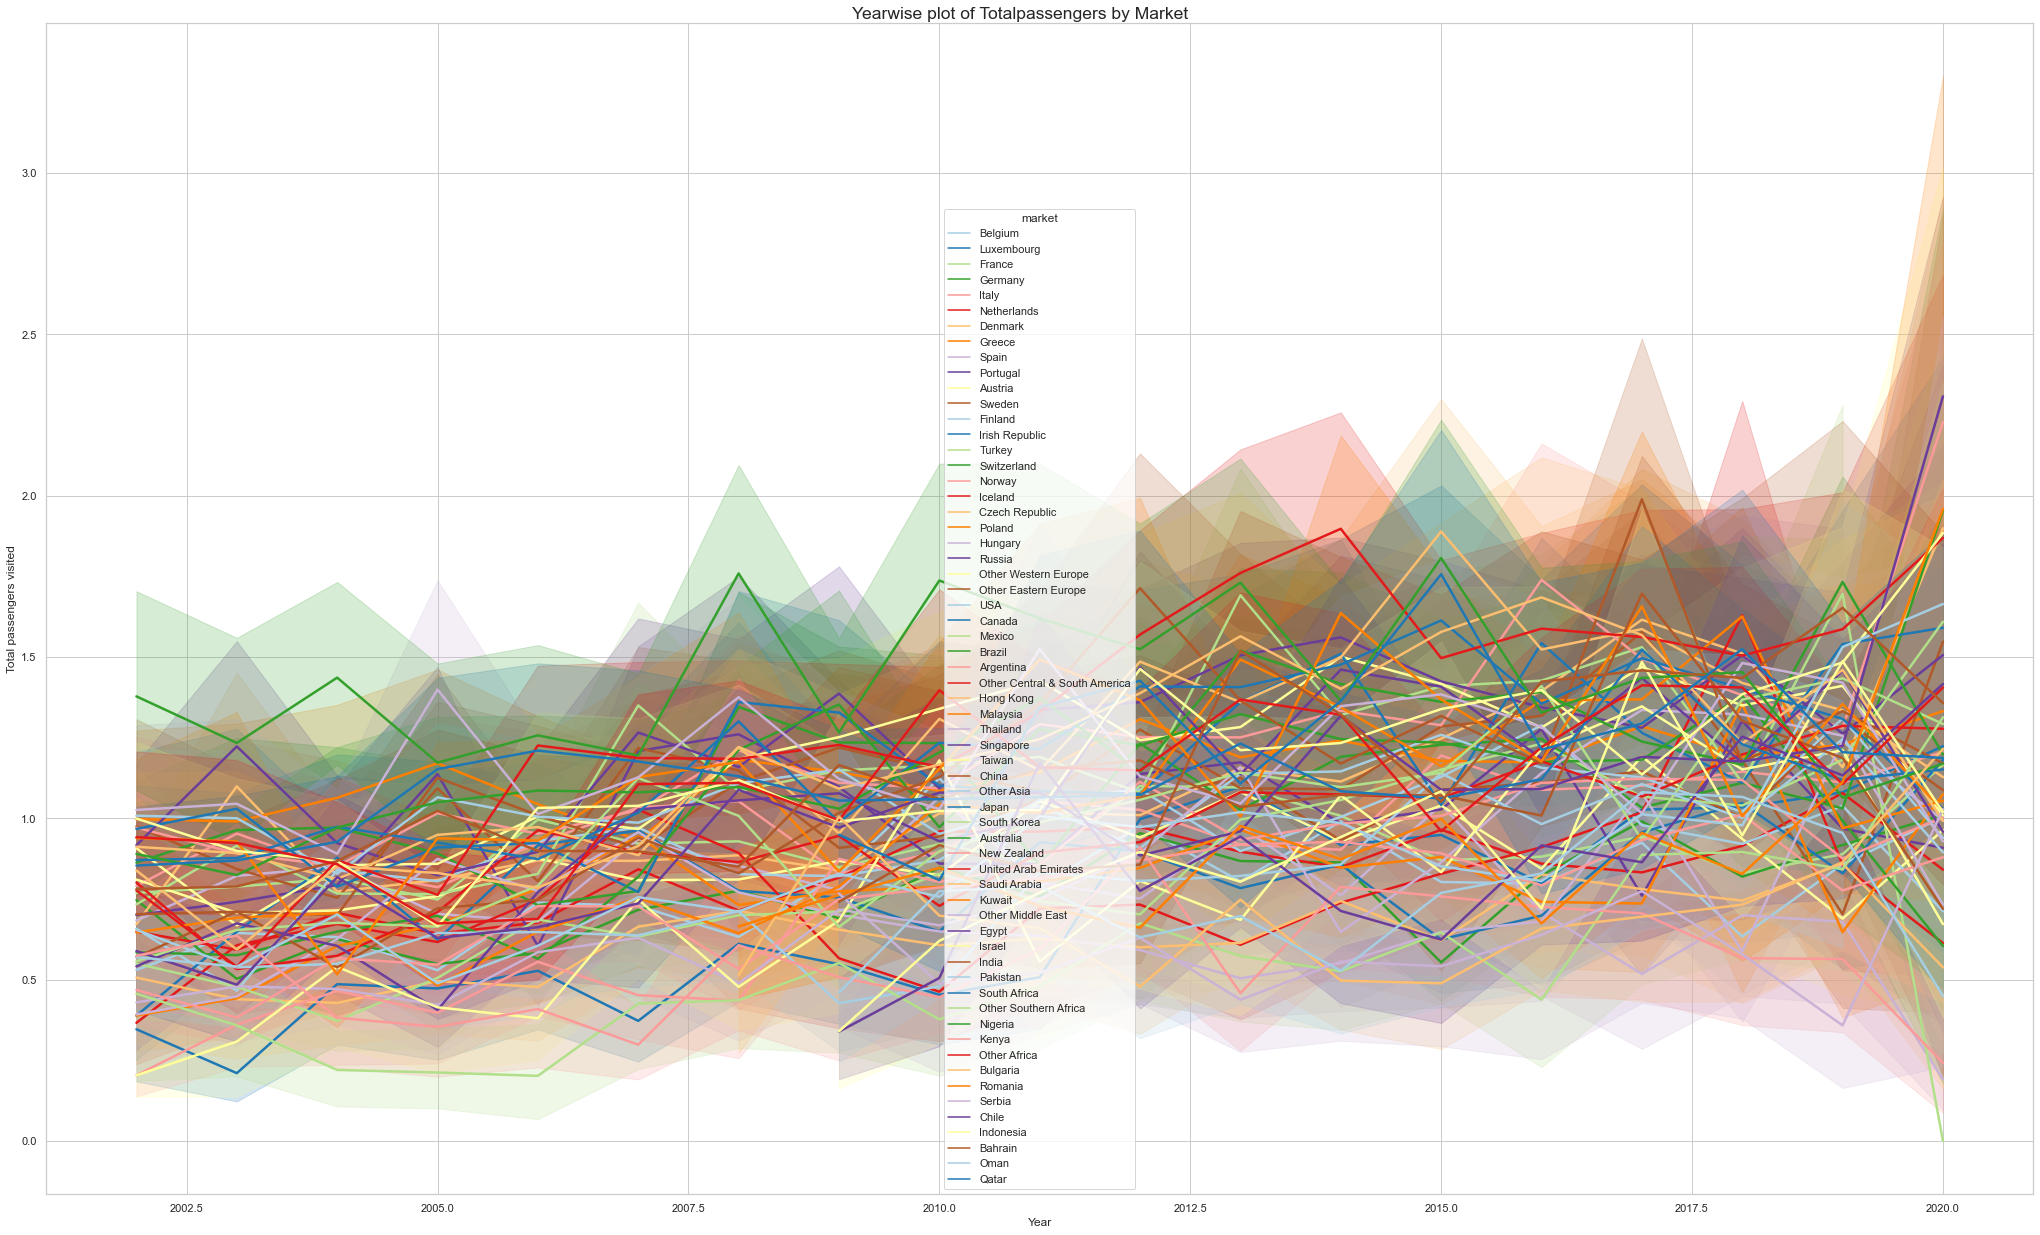

In [38]:
sns.set_theme(style="whitegrid")
# Initialize the figure
f, ax = plt.subplots(figsize=(28.5, 17.5))
f.suptitle('Yearwise plot of Totalpassengers by Market', fontsize=17.5)
plt.ticklabel_format(style='plain', axis='y', useOffset=False)
sns.lineplot(data=dataset1, x="year", y="Spend (£m)", hue="market", palette="Paired", linewidth=2.5)
ax.set_ylabel('Total passengers visited')
ax.set_xlabel('Year')
f.tight_layout()

**Correlation Matrix**

<AxesSubplot:>

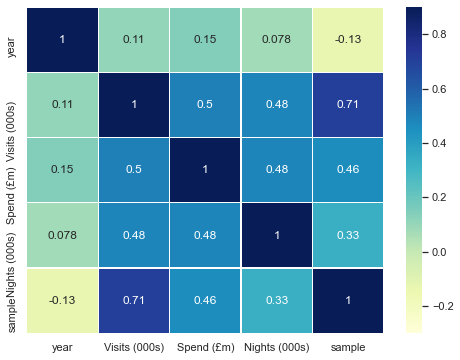

In [39]:
corr= dataset.corr()
plt.subplots(figsize=(8,6))
sns.heatmap(corr,vmin=-0.3, vmax=0.9,linewidths=0.2,annot=True,cmap="YlGnBu")

**Purpose of Visit comparison**

<AxesSubplot:>

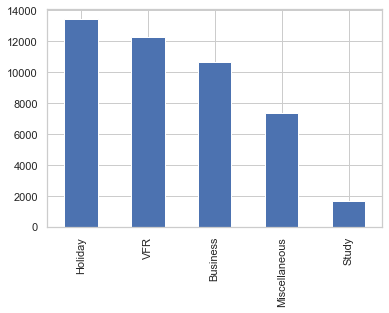

In [40]:
dataset['purpose'].value_counts().head(10).plot.bar()

**Insight : Majority People visited London during the period of 2002-2020 are for Holiday Purpose and only very less number of people visited London for the purpose of study.**

<AxesSubplot:ylabel='None'>

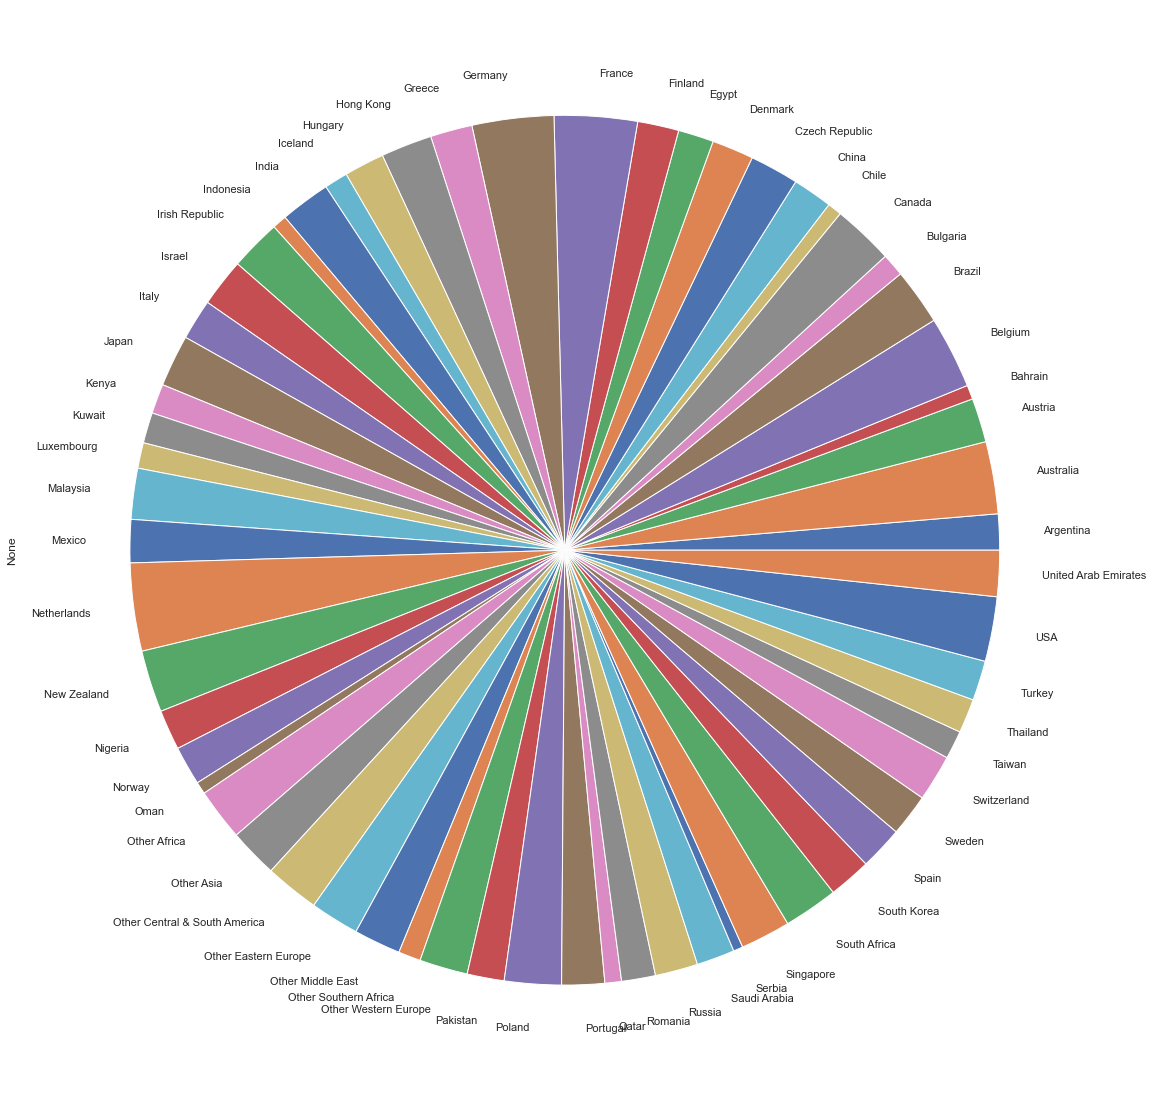

In [41]:
fig = plt.figure(figsize=(20, 20))
dataset.groupby(['market']).size().plot(kind = "pie")

**Insights: Majority Number of people visited london during the period of 2002-2020 were from USA,Netherlands & Australia.**

<AxesSubplot:xlabel='mode', ylabel='Spend (£m)'>

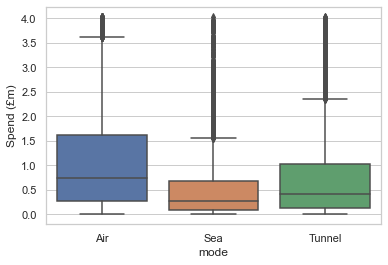

In [42]:
sns.boxplot(x='mode',y='Spend (£m)',data=dataset)

**Insight: Maximum Expense to Visit London is by Air Mode of Travel and Less Expensive is through Sea Mode.**

# 4.Modelling

In [43]:
# Splitting the Dataframe
# Independent variables
X = data_encoded.drop(['Spend (£m)'], axis=1)
# Dependent variables
y = pd.DataFrame(data_encoded['Spend (£m)'])

In [44]:
# splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.20, random_state=42)

**1. Linear Regression**

In [45]:
from sklearn import linear_model 
lr1=linear_model.LinearRegression()
model1=lr1.fit(X_train,y_train) 
prediction1=model1.predict(X_test)

In [46]:
from sklearn import metrics
from sklearn.metrics import mean_squared_error
print("MSE of spending predicted",mean_squared_error(y_test,prediction1))
print('R2 Value:',metrics.r2_score(y_test,prediction1))

MSE of spending predicted 0.4443801388579227
R2 Value: 0.4877840264642068


In [47]:
m1=mean_squared_error(y_test,prediction1)
r1=metrics.r2_score(y_test,prediction1)
performance1=pd.DataFrame([m1,r1])
performance1.columns=['Linear Regression'] 

**2.Random Forest Regressor**

In [48]:
# Fitting Random Forest Regression to the dataset
# import the regressor
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 150, random_state = 0)

# fit the regressor with x and y data
model2=regressor.fit(X_train,y_train) 

<ipython-input-48-89aac1662b4b>:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model2=regressor.fit(X_train,y_train)


In [49]:
prediction2=model2.predict(X_test)
print("MSE of spending predicted",mean_squared_error(y_test,prediction2))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction2))

MSE of spending predicted 0.4062750376131574
R2 Value: 0.5317059748684034


In [50]:
m2=mean_squared_error(y_test,prediction2)
r22=metrics.r2_score(y_test,prediction2)
performance2=pd.DataFrame([m2,r22])
performance2.columns=['Random Forest Regressor'] 

**3.K-NN Regression**

In [51]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score
from sklearn.neighbors import KNeighborsRegressor
RegModel = KNeighborsRegressor(n_neighbors=400)

In [52]:
KNN=RegModel.fit(X_train,y_train)
prediction=KNN.predict(X_test)

In [53]:
print("MSE of spending predicted",mean_squared_error(y_test,prediction))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction))

MSE of spending predicted 0.4942865359076727
R2 Value: 0.4302592824101651


In [54]:
m3=mean_squared_error(y_test,prediction)
r3=metrics.r2_score(y_test,prediction)
performance3=pd.DataFrame([m3,r3])
performance3.columns=['K-NN Regressor'] 

**4.Decision Tree Regressor**

In [55]:
# import the regressor
from sklearn.tree import DecisionTreeRegressor 
# create a regressor object
dtr = DecisionTreeRegressor(random_state =42) 
  
# fit the regressor with X and Y data
dtr_model=dtr.fit(X_train,y_train)
prediction=dtr_model.predict(X_test)

In [56]:
print("MSE of spending predicted",mean_squared_error(y_test,prediction))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction))

MSE of spending predicted 0.8280537336474426
R2 Value: 0.04554161576564064


In [57]:
m4=mean_squared_error(y_test,prediction)
r4=metrics.r2_score(y_test,prediction)
performance4=pd.DataFrame([m4,r4])
performance4.columns=['Decision Tree Regressor'] 

**5.SVM Regressor**

In [58]:
from sklearn.svm import SVR
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [59]:
regr=make_pipeline(StandardScaler(), SVR(C=1.0, epsilon=0.1))
SVM_Model=regr.fit(X_train,y_train)

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [60]:
prediction=SVM_Model.predict(X_test)
print("MSE of spending predicted",mean_squared_error(y_test,prediction))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction))

MSE of spending predicted 0.38307053860037327
R2 Value: 0.5584527036551363


In [61]:
m5=mean_squared_error(y_test,prediction)
r5=metrics.r2_score(y_test,prediction)
performance5=pd.DataFrame([m5,r5])
performance5.columns=['SVM Regressor'] 

**6.Lasso Regression**

In [62]:
from sklearn import linear_model
clf=linear_model.Lasso(alpha=0.1)
lasso_model=clf.fit(X_train,y_train)
prediction=lasso_model.predict(X_test)

In [63]:
print("MSE of spending predicted",mean_squared_error(y_test,prediction))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction))

MSE of spending predicted 0.5538453565488539
R2 Value: 0.3616086460973662


In [64]:
m6=mean_squared_error(y_test,prediction)
r6=metrics.r2_score(y_test,prediction)
performance6=pd.DataFrame([m6,r6])
performance6.columns=['Lasso Regressor']

In [65]:
performance_comparison=pd.concat([performance1,performance2,performance3,performance4,performance5,performance6],axis=1)
performance_comparison['Performance Metrics']=['MSE Value','R^2 Value']
performance_comparison=performance_comparison.set_index('Performance Metrics')
performance_comparison

,Linear Regression,Random Forest Regressor,K-NN Regressor,Decision Tree Regressor,SVM Regressor,Lasso Regressor
Performance Metrics,,,,,,
MSE Value,0.44,0.41,0.49,0.83,0.38,0.55
R^2 Value,0.49,0.53,0.43,0.05,0.56,0.36


**From the comparison of various regressor models used for the study, the model with low MSE Value is taken for fine tuning.**
**i.e, the SVM Regressor is choosen for this.**

# 5. Model fine tuning

**(i). SVR has an additional tunable parameter ε (epsilon). The value of epsilon determines the width of the tube around the estimated function (hyperplane). Points that fall inside this tube are considered as correct predictions and are not penalized by the algorithm.**

**(ii). The support vectors are the points that fall outside the tube rather than just the ones at the margin, as seen in the SVM classification example.**

**(iii). Finally, “slack” (ξ ) measures the distance to points outside the tube, and you can control how much you care about it by tuning a regularization parameter C**

In [66]:
regr=make_pipeline(StandardScaler(), SVR( tol=0.00001,C=2.0, epsilon=0.2))
SVM_Model=regr.fit(X_train,y_train)

prediction=SVM_Model.predict(X_test)
print("MSE of spending predicted",mean_squared_error(y_test,prediction))
from sklearn import metrics
print('R2 Value:',metrics.r2_score(y_test,prediction))

C:\Users\HP\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


MSE of spending predicted 0.378539331472958
R2 Value: 0.5636756118526682


**MSE reduced to 0.3785 from 0.38 after adjusting Tolerance for stopping criterion & C Value=3**

**<u>Predicting Spending using the fine tuned model.</u>**

*Predicting the amount spend(£m) by an Australian person in the October-December quarter of the year 2022 with:* 
<p>Visits (000s)=2</p>
<p>Nights (000s)=3</p>
<p>sample=2</p>
<p>purpose=study</p>
<p>mode=air</p>
<p> for a stay of 1-3  nights</p>

In [67]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 45332 entries, 0 to 61460
Data columns (total 82 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   year                                  45332 non-null  int32  
 1   Visits (000s)                         45332 non-null  float64
 2   Nights (000s)                         45332 non-null  float64
 3   sample                                45332 non-null  int64  
 4   market_Argentina                      45332 non-null  uint8  
 5   market_Australia                      45332 non-null  uint8  
 6   market_Austria                        45332 non-null  uint8  
 7   market_Bahrain                        45332 non-null  uint8  
 8   market_Belgium                        45332 non-null  uint8  
 9   market_Brazil                         45332 non-null  uint8  
 10  market_Bulgaria                       45332 non-null  uint8  
 11  market_Canada  

In [78]:
Test_case=[2022, 2, 3, 2, 0., 1, 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 1, 1, 0., 0., 0., 1, 0., 0., 0., 0., 0., 1, 0.]

In [79]:
prediction=SVM_Model.predict([Test_case])

In [80]:
print("the spending(£m) expected from a person of above details in the year 2022 will be:",prediction.item())

the spending(£m) expected from a person of above details in the year 2022 will be: 0.44565641130737144


**-By Group No:4**
    